In [1]:
import os
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
path_prefix = '/media/juan/Juan/NLP/datasets/'

emb_type = 'bert'
# emb_type = 'doc2vec'

lang = 'es'
# lang = 'en'
# lang = 'fr'

X_train_path = os.path.join(path_prefix, 'X_train_' + emb_type + '_' + lang + '.npy')
y_train_path = os.path.join(path_prefix, 'y_train_' + emb_type + '_' + lang + '.npy')

X_val_path = os.path.join(path_prefix, 'X_val_' + emb_type + '_' + lang + '.npy')
y_val_path = os.path.join(path_prefix, 'y_val_' + emb_type + '_' + lang + '.npy')

X_test_path = os.path.join(path_prefix, 'X_test_' + emb_type + '_' + lang + '.npy')
y_test_path = os.path.join(path_prefix, 'y_test_' + emb_type + '_' + lang + '.npy')

In [3]:
X_train = np.load(X_train_path)
y_train = np.load(y_train_path)

X_val = np.load(X_val_path)
y_val = np.load(y_val_path)

X_test = np.load(X_test_path)
y_test = np.load(y_test_path)

In [ ]:
model = keras.Sequential([
        layers.Dense(200, activation="relu", input_shape=(len(X_train), len(X_train[0]))),
        layers.Dropout(0.5),
        layers.Dense(3, activation='softmax')
        ])
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss="categorical_crossentropy",
    metrics=[tf.keras.metrics.Accuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)
history = model.fit(np.array(X_train), np.array(y_train), 
                    validation_data=(np.array(X_val), np.array(y_val)), 
                    epochs=200, verbose=1, batch_size=256, class_weight={0:3,1:3,2:1})
metrics = model.evaluate(X_test, y_test)
metrics.append(2*metrics[2]*metrics[3]/(metrics[2] + metrics[3]))
metrics_df = pd.DataFrame()
metrics_dict = {'lang': [lang], 'embedding': [emb_type], 'accuracy': [metrics[1]], 'precision': [metrics[2]], 'recall': [metrics[3]], 'f1_score': [metrics[4]]}
metrics_df = metrics_df.append([pd.DataFrame(data = metrics_dict)])
metrics_df.to_csv('./../../results/Classification/results' + lang + emb_type + '.csv')

Epoch 1/200
153/153 [==============================] - 1s 6ms/step - loss: 0.5804 - accuracy: 0.0087 - precision_3: 0.9332 - recall_3: 0.9304 - val_loss: 0.3147 - val_accuracy: 0.0000e+00 - val_precision_3: 0.9527 - val_recall_3: 0.9527
Epoch 2/200
153/153 [==============================] - 1s 4ms/step - loss: 0.4376 - accuracy: 1.3681e-04 - precision_3: 0.9523 - recall_3: 0.9521 - val_loss: 0.2006 - val_accuracy: 0.0000e+00 - val_precision_3: 0.9527 - val_recall_3: 0.9527
Epoch 3/200
153/153 [==============================] - 1s 4ms/step - loss: 0.4336 - accuracy: 2.4797e-04 - precision_3: 0.9524 - recall_3: 0.9524 - val_loss: 0.2120 - val_accuracy: 0.0000e+00 - val_precision_3: 0.9527 - val_recall_3: 0.9527
Epoch 4/200
153/153 [==============================] - 1s 4ms/step - loss: 0.4294 - accuracy: 3.4203e-04 - precision_3: 0.9521 - recall_3: 0.9521 - val_loss: 0.2186 - val_accuracy: 0.0000e+00 - val_precision_3: 0.9527 - val_recall_3: 0.9527
Epoch 5/200
153/153 [===================

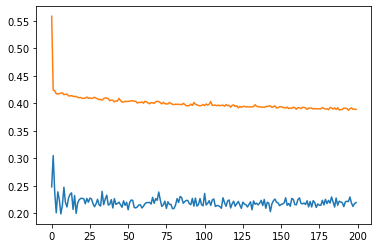

In [12]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

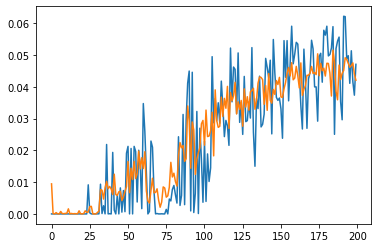

In [13]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

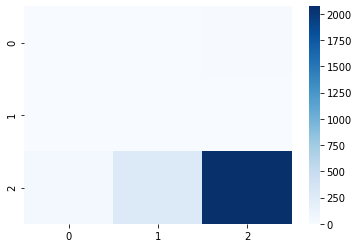

In [9]:
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(np.argmax(y_pred, axis =1),np.argmax(y_test, axis =1)), cmap='Blues')
plt.savefig('./../../results/Classification/' + lang + '_' + emb_type + '.png')

In [ ]:
from collections import Counter
print(dict(Counter(np.argmax(y_train, axis=1))))
print(dict(Counter(np.argmax(y_val, axis=1))))
print(dict(Counter(np.argmax(y_test, axis=1))))